<a href="https://colab.research.google.com/github/iAmVickster/TwitterSentimentAnalysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
import nltk
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/iAmVickster/TwitterSentimentAnalysis/main/twitter.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [19]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
data = data[["tweet", "Positive", 
             "Negative", "Neutral"]]
print(data.head())

                                               tweet  Positive  Negative  \
0   rt mayasolov woman shouldnt complain clean ho...     0.147     0.157   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...     0.000     0.280   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...     0.000     0.577   
3             rt cganderson vivabas look like tranni     0.333     0.000   
4   rt shenikarobert shit hear might true might f...     0.154     0.407   

   Neutral  
0    0.696  
1    0.720  
2    0.423  
3    0.667  
4    0.440  


In [22]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [23]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2881.276000000007
Negative:  7216.744999999915
Neutral:  14680.974999999735


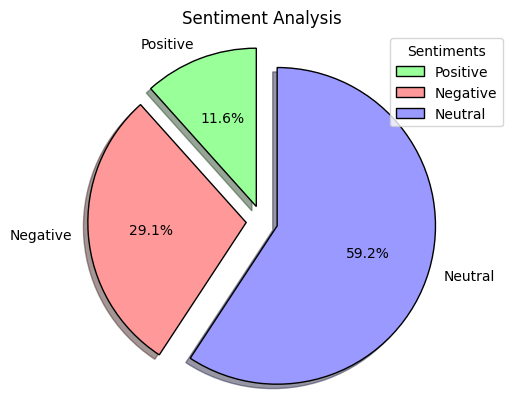

In [25]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [x, y, z]
colors = ['#99ff99', '#ff9999', '#9999ff']
explode = (0.1, 0.1, 0.1)  # explode the largest slice

# Create a pie chart with custom styling
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})

# Add a title and legend
ax.set_title('Sentiment Analysis')
ax.legend(title='Sentiments', loc='best')

# Set aspect ratio to equal to make the pie circular
ax.axis('equal')

# Display the chart
plt.show()


1. Importing necessary libraries:
   - `pandas` and `numpy` are libraries for data manipulation and analysis.
   - `CountVectorizer` is used for converting text data into numerical features.
   - `train_test_split` is used to split the data into training and testing sets.
   - `DecisionTreeClassifier` is a machine learning algorithm for classification.
   - `re` is a library for working with regular expressions.
   - `nltk` is the Natural Language Toolkit library for text processing.
   - `matplotlib` is a plotting library for creating visualizations.

2. Reading the data:
   - The code reads a CSV file called "twitter.csv" using `pd.read_csv` and stores it in the variable `data`.
   - The `print(data.head())` statement displays the first few rows of the data to check its contents.

3. Text preprocessing:
   - The code defines a function called `clean` to clean and preprocess the text data.
   - The function performs various operations like converting text to lowercase, removing URLs, removing punctuation, removing stopwords (common words like "the," "is," etc.), and stemming (reducing words to their base form).
   - The `data["tweet"].apply(clean)` line applies the `clean` function to each tweet in the "tweet" column of the data.

4. Sentiment analysis:
   - The code uses the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from NLTK.
   - It calculates the positive, negative, and neutral sentiment scores for each cleaned tweet using the `SentimentIntensityAnalyzer` class.
   - The scores are added as new columns ("Positive," "Negative," "Neutral") to the `data` DataFrame.

5. Summing up sentiment scores:
   - The code sums up the positive, negative, and neutral sentiment scores using the `sum` function and stores them in variables `x`, `y`, and `z`, respectively.

6. Determining overall sentiment:
   - The code defines a function called `sentiment_score` to determine the overall sentiment based on the sum of positive, negative, and neutral scores.
   - It compares the scores and prints a corresponding sentiment label ("Positive," "Negative," or "Neutral").

7. Displaying sentiment scores:
   - The code prints the values of `x`, `y`, and `z`, which represent the total positive, negative, and neutral sentiment scores, respectively.

8. Creating a pie chart:
   - The code creates a pie chart using the `plt.pie` function from the `matplotlib.pyplot` module.
   - The chart displays the proportions of positive, negative, and neutral sentiments using the `sizes` list.
   - The `labels` list provides labels for each sentiment category.
   - The `colors` list specifies colors for each category.
   - The `explode` tuple is used to offset the largest slice of the pie for emphasis.

9. Styling the pie chart:
   - The code adds additional styling options to the pie chart.
   - The `shadow=True` parameter adds a shadow effect to the chart.
   - The `wedgeprops={'edgecolor': 'black'}` parameter adds black edges to each wedge of the chart.

10. Adding title and legend:
    - The code adds a title to the pie chart using the `ax.set_title` function.
    - The `ax.legend` function adds a legend to the chart, providing labels for each sentiment category.
11. Setting aspect ratio and displaying the chart:

    - The code sets the aspect ratio of the pie chart to make it circular using ax.axis('equal').
    - Finally, the plt.show() function displays the chart on the screen.



